In [1]:
# Lab | Customer Analysis Round

#For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the previous lab's `Data` folder.

### Get the data

#We are using the `marketing_customer_analysis.csv` file.

### Processing Data - Numerical

#(_Further processing..._)

# - Plot the distribution of the different numerical values

# - Check and deal with `null` values
# - Check and deal with outliers

# - Normalize columns

# - Conduct Linear Regressions
  # - Using Statsmodels
  # - Using sklearn
  # - Interpret results  
  # - Compare with previous lab
  
  # Now, repeat Linear Regressions but standarizing columns instead of normalizing and check for differences

In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
customer_analysis=pd.read_csv("marketing_customer_analysis.csv")
customer_analysis

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
customer_analysis.columns = customer_analysis.columns.str.lower()
customer_analysis.columns = customer_analysis.columns.str.replace(' ', '_')
customer_analysis.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
customer_analysis = customer_analysis.drop(['unnamed:_0'], axis=1)
customer_analysis.tail()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,1/8/11,Unemployed,M,0,...,0.0,3,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN


In [6]:
customer_analysis = customer_analysis.drop_duplicates()
customer_analysis.shape

(10873, 25)

In [7]:
customer_analysis.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

In [8]:
numeric_columns = customer_analysis.select_dtypes(include='number').columns.tolist()
numerical = customer_analysis[numeric_columns]
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


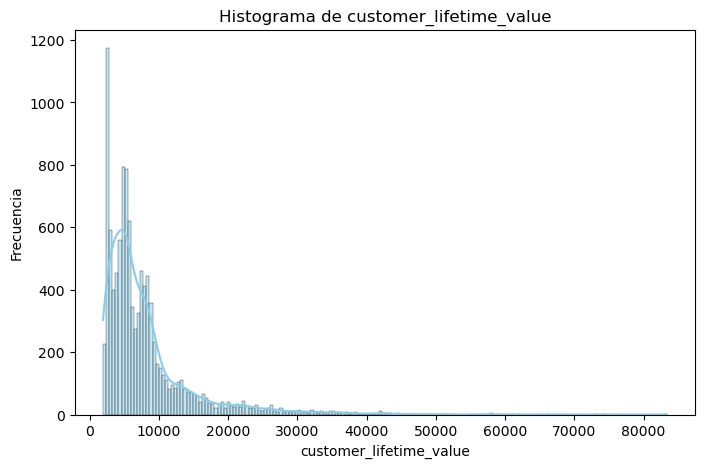

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


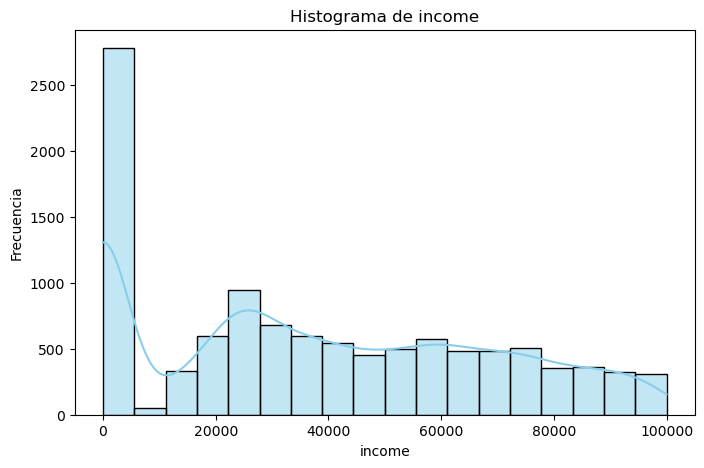

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


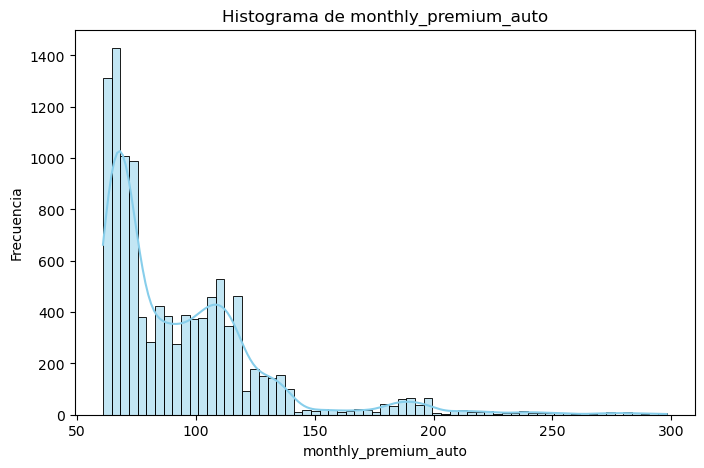

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


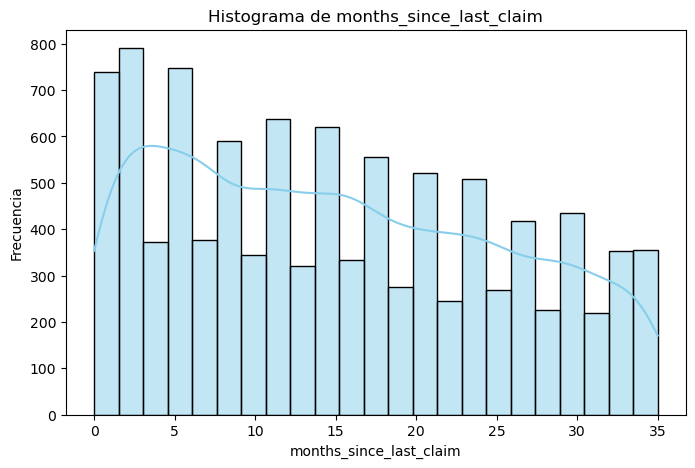

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


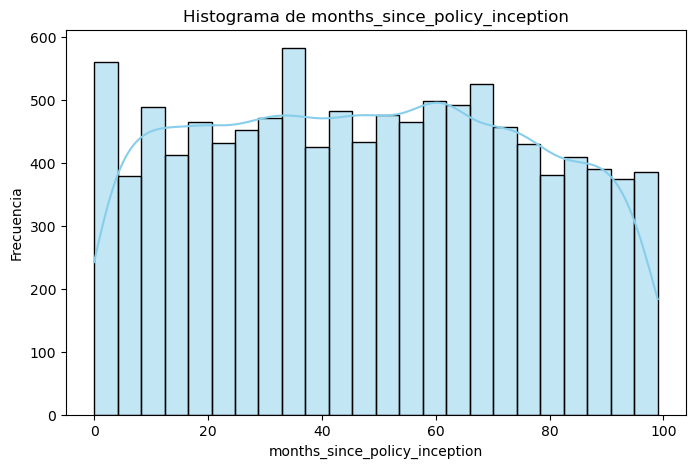

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


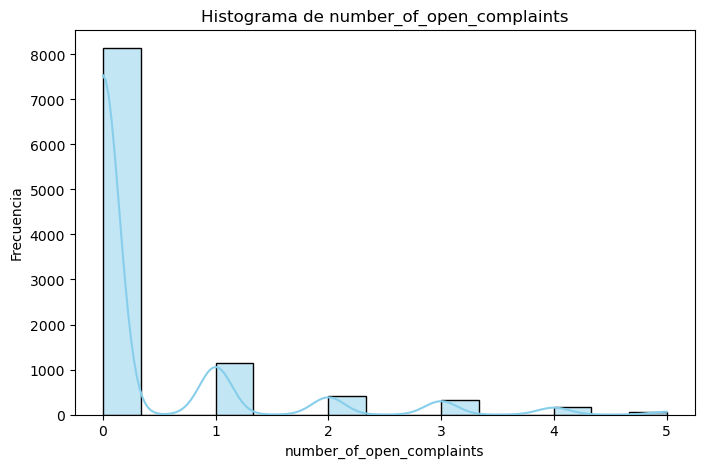

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


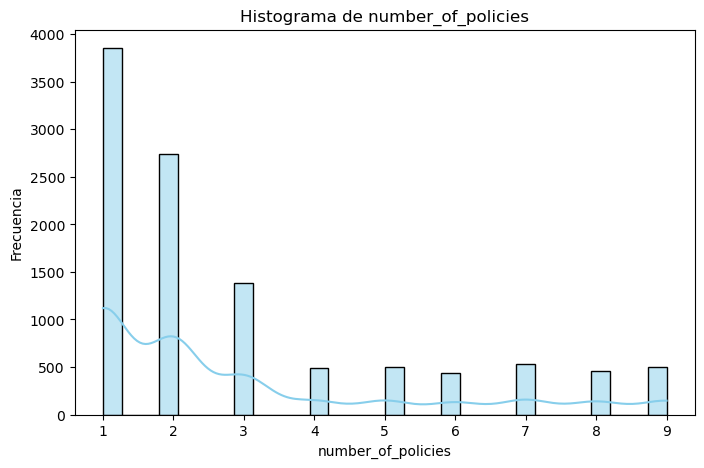

C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


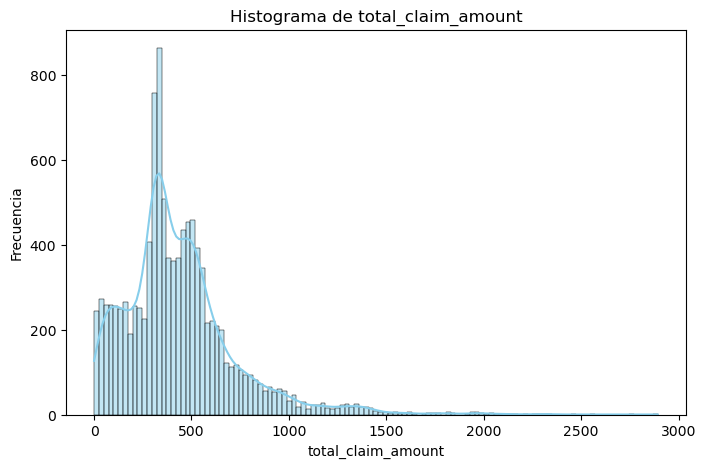

In [9]:
# - Plot the distribution of the different numerical values
for column in numerical.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numerical[column], kde=True, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

In [10]:
# - Check and deal with `null` values
nulls = pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
3,months_since_last_claim,0.057298
5,number_of_open_complaints,0.057298
0,customer_lifetime_value,0.000000
1,income,0.000000
2,monthly_premium_auto,0.000000
4,months_since_policy_inception,0.000000
6,number_of_policies,0.000000
7,total_claim_amount,0.000000


<Axes: >

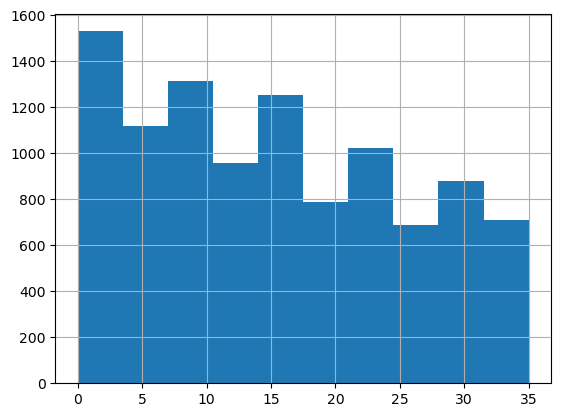

In [11]:
numerical['months_since_last_claim'].hist()

<Axes: >

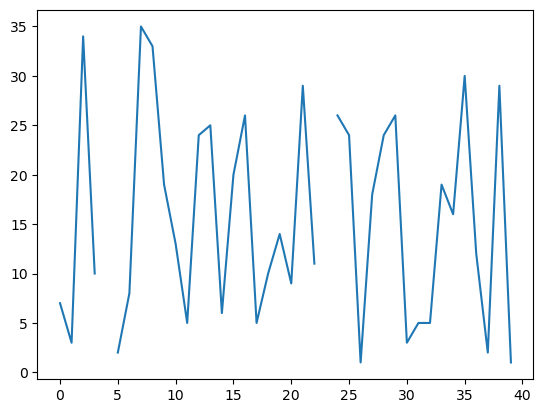

In [12]:
numerical['months_since_last_claim'][0:40].plot()

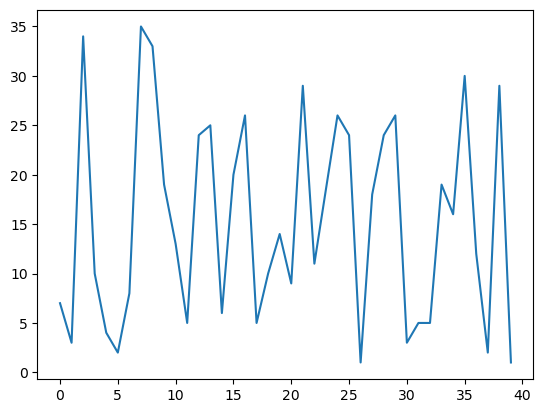

In [13]:
#new_months_since_last_claim = numerical['months_since_last_claim'][0:40].interpolate(method='linear')
new_months_since_last_claim = numerical['months_since_last_claim'][0:40].interpolate(method='akima')  # Other methods that can be used
#new_months_since_last_claim = numerical['months_since_last_claim'][0:40].interpolate(method='polynomial', order=3)  # Other methods that can be used
new_months_since_last_claim.plot()
plt.show()

C:\Users\matte\AppData\Local\Temp\ipykernel_19956\4208112828.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(points[1:])   # We are using the index __1:__ as first value was NaN
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='months_since_last_claim', ylabel='Density'>

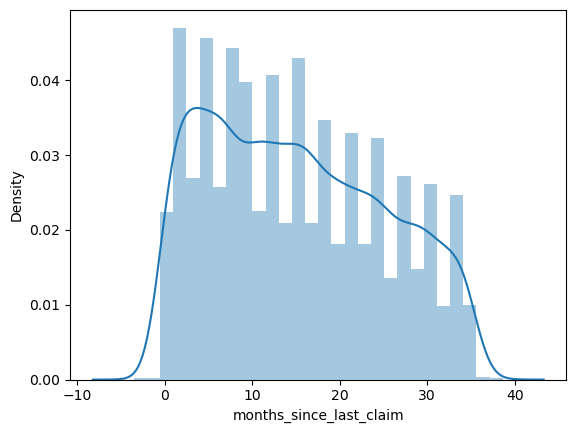

In [14]:
# Test what does the distribution look like after we have used interpolation method
points = numerical['months_since_last_claim'].interpolate(method='akima')
sns.distplot(points[1:])   # We are using the index __1:__ as first value was NaN

C:\Users\matte\AppData\Local\Temp\ipykernel_19956\573043555.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(points2)
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='months_since_last_claim', ylabel='Density'>

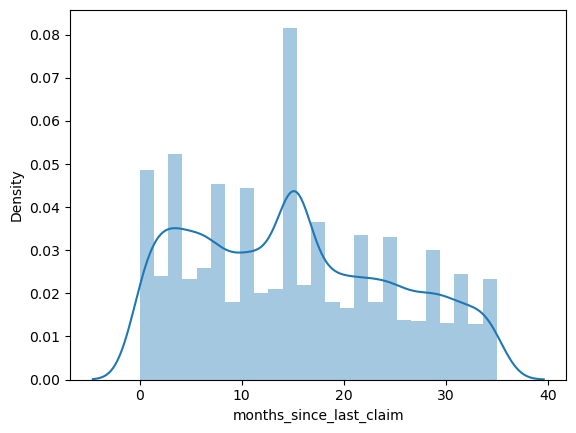

In [15]:
# Testing interpolation method with mean and median methods
points2 = numerical['months_since_last_claim'].fillna(np.mean(numerical['months_since_last_claim']))
sns.distplot(points2)

C:\Users\matte\AppData\Local\Temp\ipykernel_19956\1153147963.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(points3)
C:\Users\matte\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='months_since_last_claim', ylabel='Density'>

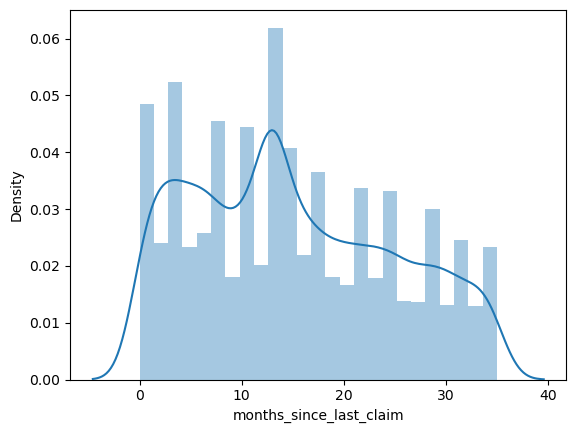

In [16]:
# Note that unlike "np.mean()" , "np.median()" doesn't work if there are any null values in the column
median = np.median(numerical['months_since_last_claim'].fillna(0))
points3 = numerical['months_since_last_claim'].fillna(median)
sns.distplot(points3)

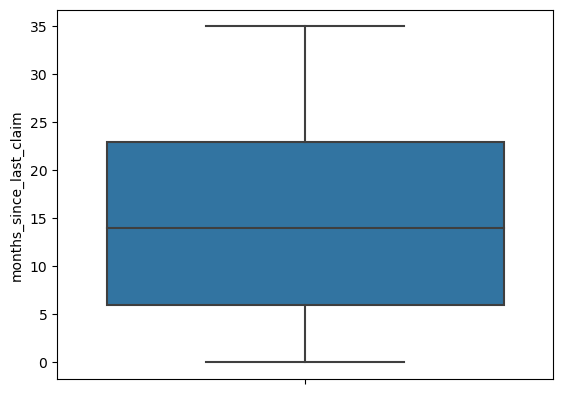

In [17]:
sns.boxplot(y=numerical['months_since_last_claim'])
plt.show()

In [18]:
#Elegimos el metodo akima
numerical['months_since_last_claim'] = numerical['months_since_last_claim'].interpolate(method='akima')
numerical

C:\Users\matte\AppData\Local\Temp\ipykernel_19956\871228618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['months_since_last_claim'] = numerical['months_since_last_claim'].interpolate(method='akima')


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.000000,52,0.0,9,292.800000
1,2228.525238,0,64,3.000000,26,0.0,1,744.924331
2,14947.917300,22139,100,34.000000,31,0.0,2,480.000000
3,22332.439460,49078,97,10.000000,3,0.0,2,484.013411
4,9025.067525,23675,117,4.011257,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,9.108934,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.000000,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.000000,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.000000,27,4.0,6,618.288849


In [19]:
# - Check and deal with `null` values
nulls = pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
5,number_of_open_complaints,0.057298
0,customer_lifetime_value,0.000000
1,income,0.000000
2,monthly_premium_auto,0.000000
3,months_since_last_claim,0.000000
4,months_since_policy_inception,0.000000
6,number_of_policies,0.000000
7,total_claim_amount,0.000000


<Axes: >

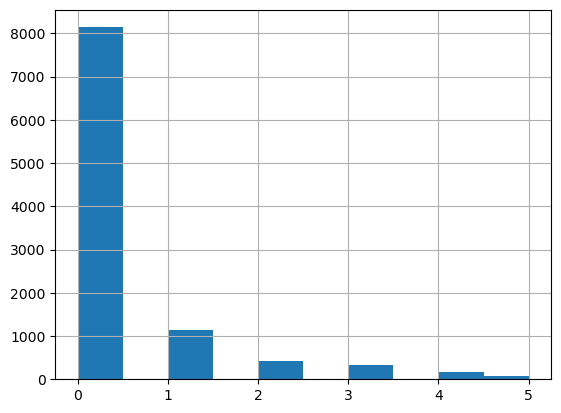

In [20]:
numerical['number_of_open_complaints'].hist()

In [21]:
numerical.number_of_open_complaints.value_counts()

number_of_open_complaints
0.0    8141
1.0    1141
2.0     414
3.0     321
4.0     166
5.0      67
Name: count, dtype: int64

<Axes: >

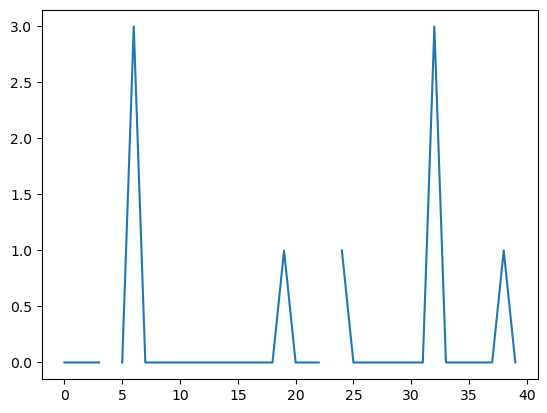

In [22]:
numerical['number_of_open_complaints'][0:40].plot()

C:\Users\matte\AppData\Local\Temp\ipykernel_19956\3543932652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical['number_of_open_complaints'].fillna(0, inplace=True)


<Axes: >

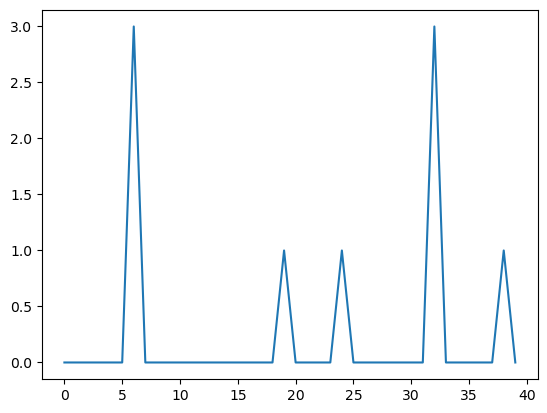

In [23]:
numerical['number_of_open_complaints'].fillna(0, inplace=True)
numerical['number_of_open_complaints'][0:40].plot()

In [24]:
# - Check and deal with `null` values
nulls = pd.DataFrame(numerical.isna().sum()/len(numerical))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
0,customer_lifetime_value,0.0
1,income,0.0
2,monthly_premium_auto,0.0
3,months_since_last_claim,0.0
4,months_since_policy_inception,0.0
5,number_of_open_complaints,0.0
6,number_of_policies,0.0
7,total_claim_amount,0.0


In [25]:
numerical.number_of_open_complaints.value_counts()

number_of_open_complaints
0.0    8764
1.0    1141
2.0     414
3.0     321
4.0     166
5.0      67
Name: count, dtype: int64

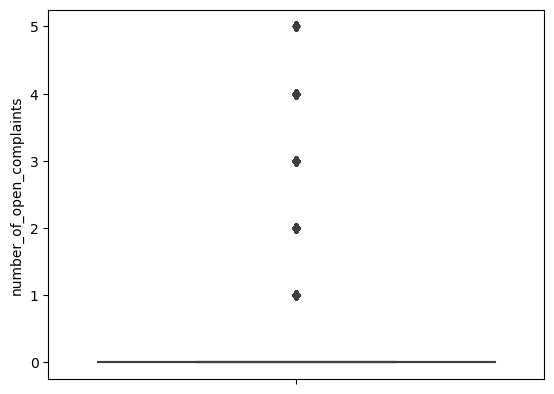

In [26]:
sns.boxplot(y=numerical['number_of_open_complaints'])
plt.show()

In [27]:
# Checking how many values will be removed if the outliers are removed
iqr = np.percentile(numerical['number_of_open_complaints'],75) - np.percentile(numerical['number_of_open_complaints'],25)
upper_limit = np.percentile(numerical['number_of_open_complaints'],75) + 3.0*iqr
print(upper_limit)

0.0


In [28]:
#De los outliers no tocamos nada, dejamos asi.

In [57]:
# - Normalize columns
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.000000,52,0.0,9,292.800000
1,2228.525238,0,64,3.000000,26,0.0,1,744.924331
2,14947.917300,22139,100,34.000000,31,0.0,2,480.000000
3,22332.439460,49078,97,10.000000,3,0.0,2,484.013411
4,9025.067525,23675,117,4.011257,31,0.0,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,9.108934,40,0.0,7,1214.400000
10906,5259.444853,61146,65,7.000000,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.000000,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.000000,27,4.0,6,618.288849


In [59]:
Y=numerical["total_claim_amount"]
X=numerical.drop(["total_claim_amount"], axis=1)

In [ ]:
#Normalizando 
transformer=StandardScaler().fit(X_num)
x_normalized=transformer.transform(X_num)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

In [61]:
#Normalizar datos, creamos el marco en el que vamos a trabajar hacer esto despues de limpiar nulos y outliers
from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(X)
x_normalized=transformer.transform(X)
print(x_normalized)

[[9.96331517e-02 9.95022825e-01 1.26374466e-03 ... 1.07729053e-03
  0.00000000e+00 1.86454130e-04]
 [9.99518905e-01 0.00000000e+00 2.87047276e-02 ... 1.16612956e-02
  0.00000000e+00 4.48511369e-04]
 [5.59573342e-01 8.28770589e-01 3.74348701e-03 ... 1.16048097e-03
  0.00000000e+00 7.48697402e-05]
 ...
 [5.14349634e-01 8.57568560e-01 4.32691419e-03 ... 1.35619698e-03
  0.00000000e+00 4.30538725e-05]
 [1.83332463e-01 9.83047898e-01 2.41952750e-03 ... 4.13463560e-04
  6.12538608e-05 9.18807912e-05]
 [9.99881235e-01 0.00000000e+00 1.47266075e-02 ... 1.45807995e-04
  0.00000000e+00 4.37423986e-04]]


In [63]:
Y

0         292.800000
1         744.924331
2         480.000000
3         484.013411
4         707.925645
            ...     
10905    1214.400000
10906     273.018929
10907     381.306996
10908     618.288849
10909    1021.719397
Name: total_claim_amount, Length: 10873, dtype: float64

In [ ]:
# - Conduct Linear Regressions
  # - Using Statsmodels
  # - Using sklearn
  # - Interpret results  
  # - Compare with previous lab
  
  # Now, repeat Linear Regressions but standarizing columns instead of normalizing and check for differences

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.6, random_state=42)

In [114]:
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)

In [116]:
predictions=lm.predict(X_test)

In [118]:
r2=r2_score(y_test, predictions)
print(r2)
#ir probando el normalizar y standarizar y cambiar el 0.8 con numeros entre 0.6 y 0.9

0.5259826434840076


In [121]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary()) #hacer siempre esto en supervisados
# en este modelo nos interesa ver siempre el r-squared que tiene que estar 0.5 para arriba (puede que sea mas bajo si las varibales y dependan de x)
# mirar siemore el coef y el P>/t/ si es mas de 0.1 es no significativa, menos es significativo

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1683.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:35:27   Log-Likelihood:                -73167.
No. Observations:               10873   AIC:                         1.463e+05
Df Residuals:                   10865   BIC:                         1.464e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [125]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
print("R2 value is = ",round(lm.score(X,Y),2))

R2 value is =  0.52


In [129]:
#Escalar datos, probar luego el modelo con cual viene mejor.
transformer=MinMaxScaler().fit(X)
transformer
x_scaled=transformer.transform(X)
print(x_scaled.shape)
pd.DataFrame(x_scaled)

(10873, 8)


,0,1,2,3,4,5,6,7
0,0.0,0.035752,0.480381,0.000000,0.250296,0.525253,0.0,1.000
1,0.0,0.004059,0.000000,0.012658,0.155524,0.262626,0.0,0.000
2,0.0,0.160264,0.221432,0.164557,0.890010,0.313131,0.0,0.125
3,0.0,0.250953,0.490873,0.151899,0.321376,0.030303,0.0,0.125
4,0.0,0.087527,0.236795,0.236287,0.179484,0.313131,0.0,0.750
...,...,...,...,...,...,...,...,...
10868,0.0,0.167823,0.000000,0.810127,0.300264,0.404040,0.0,0.750
10869,0.0,0.041281,0.611576,0.016878,0.250296,0.686869,0.0,0.625
10870,0.0,0.270122,0.398446,0.590717,0.345069,0.636364,0.0,0.125
10871,0.0,0.123717,0.642072,0.409283,0.084445,0.272727,0.8,0.625


In [132]:
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary()) #hacer siempre esto en supervisados
# en este modelo nos interesa ver siempre el r-squared que tiene que estar 0.5 para arriba (puede que sea mas bajo si las varibales y dependan de x)
# mirar siemore el coef y el P>/t/ si es mas de 0.1 es no significativa, menos es significativo

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     1683.
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        17:42:26   Log-Likelihood:                -73167.
No. Observations:               10873   AIC:                         1.463e+05
Df Residuals:                   10865   BIC:                         1.464e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
#Conclusiones:
#el R-cuadrado: El valor de R-cuadrado para el modelo es de 0.522, ligeramente más alto que el valor de R-cuadrado de 0.520 para este modeloi modelo. Esto indica que aproximadamente el 52.2% de la variabilidad en el monto total de reclamo puede explicarse por las variables independientes, en comparación con el 52.0% de este modelo.
#Coeficientes: Los coeficientes y sus valores p correspondientes en ambos modelos muestran patrones similares de significancia para las variables independientes. Sin embargo, hay diferencias leves en los coeficientes entre los dos modelos, indicando posibles diferencias en los efectos estimados de las variables independientes sobre la variable dependiente.